In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Best Seller Books Dataset

#### 4.1. Dataset Overview

In [92]:
df = pd.read_csv('Bestseller_Books.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Description of the Dataset:
I will mention in the form of 'Features':'Description'
- Name: Name of the Book
- Author: Author Name who wrote the book
- User Rating: Rating given by the users in many selling sites and online platforms for that particular book
- Reviews: No. of people who bought that book and mentioned their feedback and experience related to that book in popular websites.
- Price: The price of the book (In USD)
- Year: The year in which that book was mentioned as the 'Best selling book of the year'
- Genre: It's a categorical column which categorizes the book as either "Fictional' or 'Non Fictional Book'
  

Finding the number of Rows and Columns in the Dataset:

In [96]:
df.shape

(550, 7)

Checking for Missing Values:

In [99]:
# To check if there is any outliers in the Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


There is no missing values in the dataset. If there was any missing values in the dataset I would have used the Imputation methods like
- Mean Value Imputation
- Median Value Imputation
- Mode Value Imputation
- We can use any ML algorithms like KNN to impute the value.  

In [102]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


##### Checking if there is any outliers present in the 'User Rating'

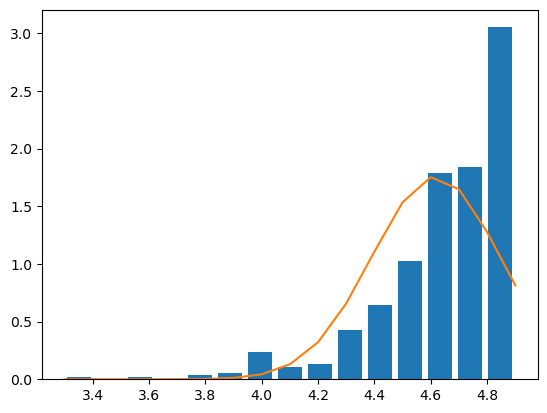

In [105]:
from scipy.stats import norm

plt.hist(df['User Rating'], bins = 15, rwidth=0.8, density = True)

rnge = np.arange(df['User Rating'].min(), df['User Rating'].max(), 0.1)
plt.plot(rnge, norm.pdf(rnge, df['User Rating'].mean(), df['User Rating'].std()))

Outliers are there in the 'User Rating column' since here the data is left skewed.

We can remove the outliers by using three different techniques:
- Inter Quartile Range
- Quantile Approach (by mentioning CI value like 95%)
- Standard Deviation Approach (1 std, 2 std, 3 std or 4 std)
- Z Score Approach (we will use the standardization (X-mu/sigma))

In [109]:
# Now I will be using the IQR Approach for removing the null values
Q1 = df['User Rating'].quantile(0.25)
Q3 = df['User Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df_cleaned = df[(df['User Rating']>lower_limit) & (df['User Rating']<upper_limit)]
no_of_rows_removed = df.shape[0] - df_cleaned.shape[0]
no_of_rows_removed

21

##### Checking if there is any outliers present in the 'Reviews'

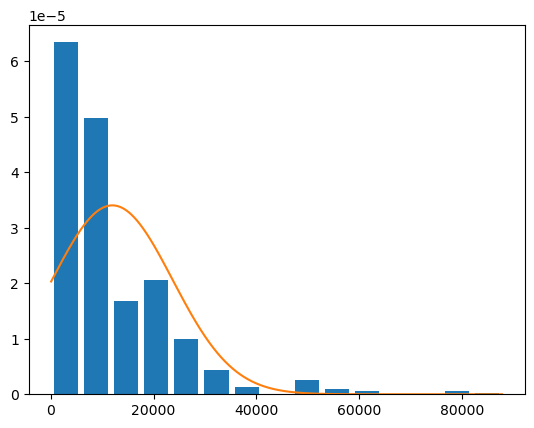

In [112]:
from scipy.stats import norm

plt.hist(df['Reviews'], bins = 15, rwidth=0.8, density = True)

rnge = np.arange(df['Reviews'].min(), df['Reviews'].max(), 0.1)
plt.plot(rnge, norm.pdf(rnge, df['Reviews'].mean(), df['Reviews'].std()))

Outliers are there in the 'Reviews' since here the data is right skewed.

In [114]:
# Removing the Outliers in this data by using the IQR Approach
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df_cleaned = df[(df['Reviews']>lower_limit) & (df['Reviews']<upper_limit)]
no_of_rows_removed = df.shape[0] - df_cleaned.shape[0] 
no_of_rows_removed

17

##### Checking if there is any outliers present in the 'Price'

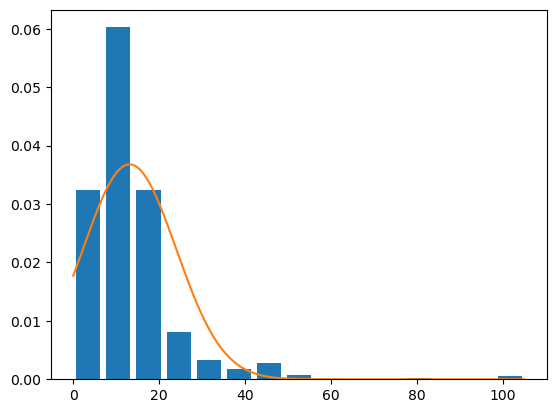

In [118]:
from scipy.stats import norm

plt.hist(df['Price'], bins = 15, rwidth=0.8, density = True)

rnge = np.arange(df['Price'].min(), df['Price'].max(), 0.1)
plt.plot(rnge, norm.pdf(rnge, df['Price'].mean(), df['Price'].std()))

Outliers are there in the 'Price' since here the data is right skewed.

In [121]:
# Checking if there is any outliers present in the 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df_cleaned = df[(df['Price']>lower_limit) & (df['Price']<upper_limit)]
no_of_rows_removed = df.shape[0] - df_cleaned.shape[0]
no_of_rows_removed

31

##### Checking for any duplicate books are present in the dataset

In [126]:
duplicate_rows = df[df.duplicated]
duplicate_rows.shape[0]


0

If there are duplicate values in the dataset, we can remove the rows which will have the duplicates. But here in this dataset we have no duplicate values.

#### 4.2. Visualization and Analysis

1) How have average book prices changed over the years?

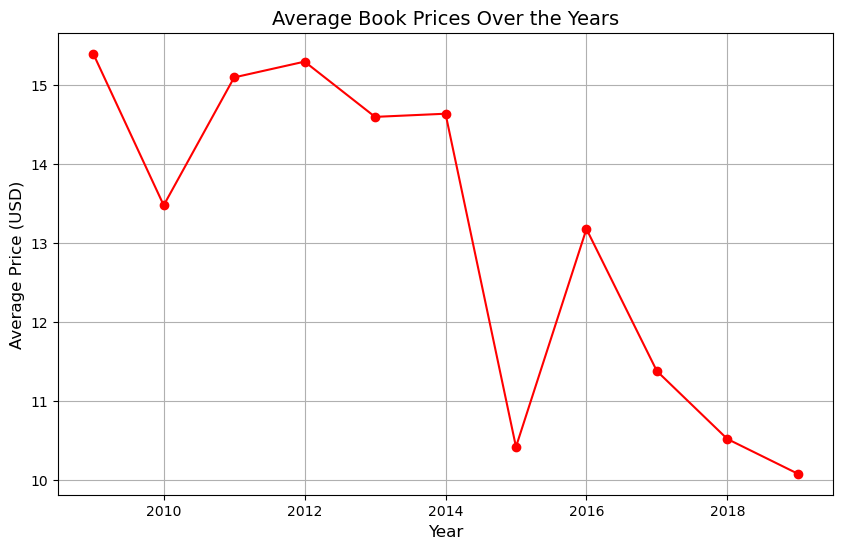

In [136]:
avg_price_yr = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_price_yr.index, avg_price_yr.values, marker='o', c='red')

# Chart details
plt.title('Average Book Prices Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid()
plt.show()


- This line plot clearly shows how the average book prices changes over the years.
- By using this plot we can identify whether the prices are increased, decreased or stayed in the same price over the years.
- In this plot the price fluctuates ie. in 2010 the price dropped, again increased in 2012, 2013 and 2014 then it encounters a significant drop in 2015, again peaked in 2016 then again dropped in 2017,2018 and 2019.
- The pricing strategies that we can suggest for publishers are
   - If the average prices increases steadily, then they can set higher prices for new releases and set a price drop for the older books so that their sales won't face any challenges.
   - If the average price of books keeps on decreasing every year, then the publishers should do some campaigning or give some attractive offers to attract the book readers to make them purchase more.

2) Do Fiction or Non-Fiction books have higher average ratings?

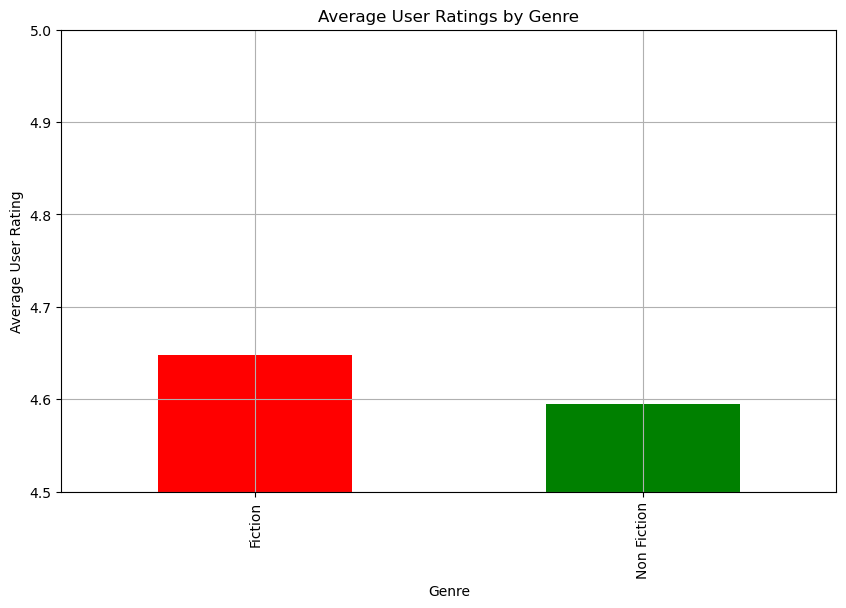

In [156]:
avg_rating_genre = df.groupby('Genre')['User Rating'].mean()
plt.figure(figsize=(10, 6))
avg_rating_genre.plot(kind='bar',color=['red','green'])
plt.title('Average User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.ylim(4.5, 5)
plt.grid()
plt.show()

- This bar chart clearly shows the comparison for the 'average user ratings' between 'Fiction' and 'Non-Fiction' books. 
- The average rating of Fiction books is higher compared to that of Non Fiction Books. The rating of Fiction Books is higher.
- The pricing strategies that we can suggest for publishers are
    - They need to produce both the fiction and non fiction books in equal amounts. And, inorder to push the rating and attract customers to make study non fiction books they have to redesign their marketing strategies.

3. Which authors have the most bestseller books?

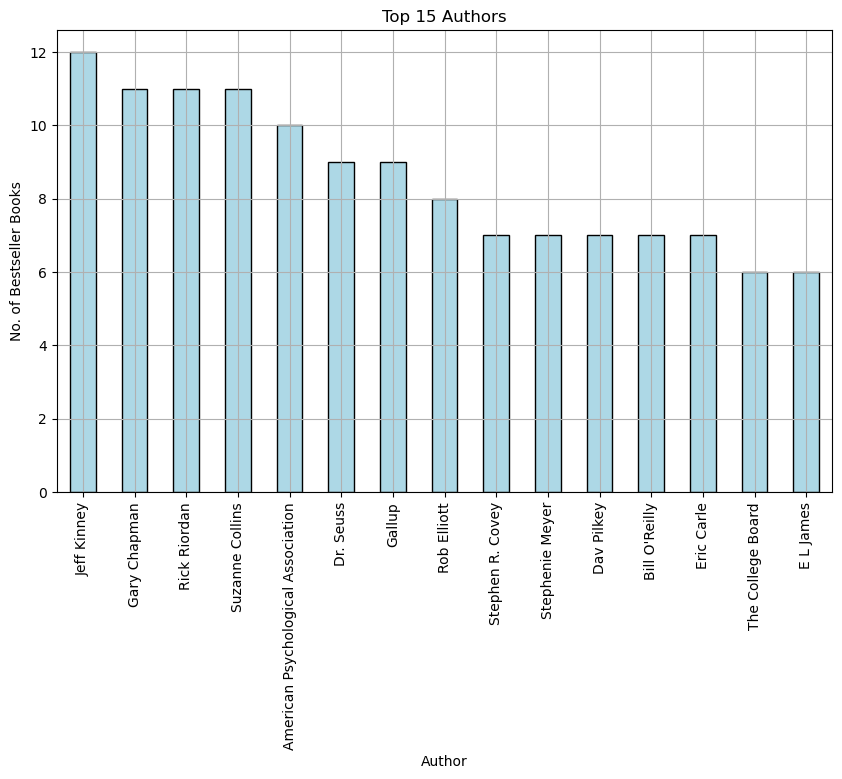

In [158]:
popular_authors = df['Author'].value_counts().head(15)  
plt.figure(figsize=(10, 6))
popular_authors.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 15 Authors')
plt.xlabel('Author')
plt.ylabel('No. of Bestseller Books')

plt.grid()
plt.show()

- This bar chart clearly shows the top 15 authors with the highest number of bestseller books. 
- 'Jeff Kinney', 'Gary Chapman' and 'Rick Riordan' are the most popular authors with highest no. of bookseller books.
- The pricing strategies that we can suggest for publishers are
  - Publishers should use the popularity of these authors and publish more books of these authors so that they can earn more profit.
  - Also these publishers should clearly mention the "Author name - Best author's book" Kind of tagline to maximize their sales.

4. Is there a correlation between price and the number of reviews?

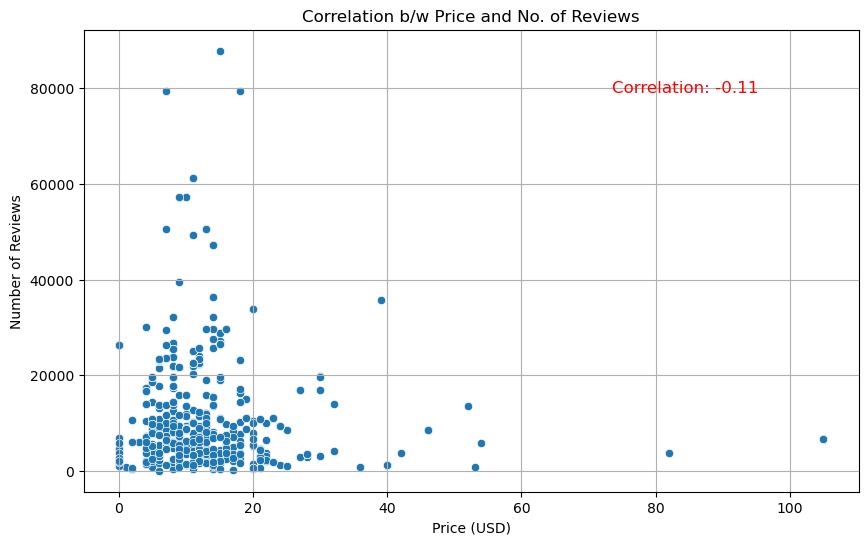

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Reviews')
corr = df['Price'].corr(df['Reviews'])
plt.title('Correlation b/w Price and No. of Reviews')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Reviews')
plt.grid()
plt.text(
    x=max(df['Price']) * 0.7, 
    y=max(df['Reviews']) * 0.9, 
    s=f'Correlation: {corr:.2f}', 
    fontsize=12, 
    color='red'
)
plt.show()



- This scatter plot clearly shows the relationship b/w book prices and the no. of reviews.
- Here the correlation is -0.11 ie) approximately equal to zero. So it shows a little negative to no correlation.
- Actually the pricing is not affecting the user engagement and reviews for that particular book.
- The pricing strategies that we can suggest for publishers are
  - The publishers, should lower the pricing strategies so that many users can purchase that book and they may provide good reviews such as "I got this wonderful book for a very lower price and they will mention as 'Worth Buying'"


5. What are the most common price ranges for bestseller books?

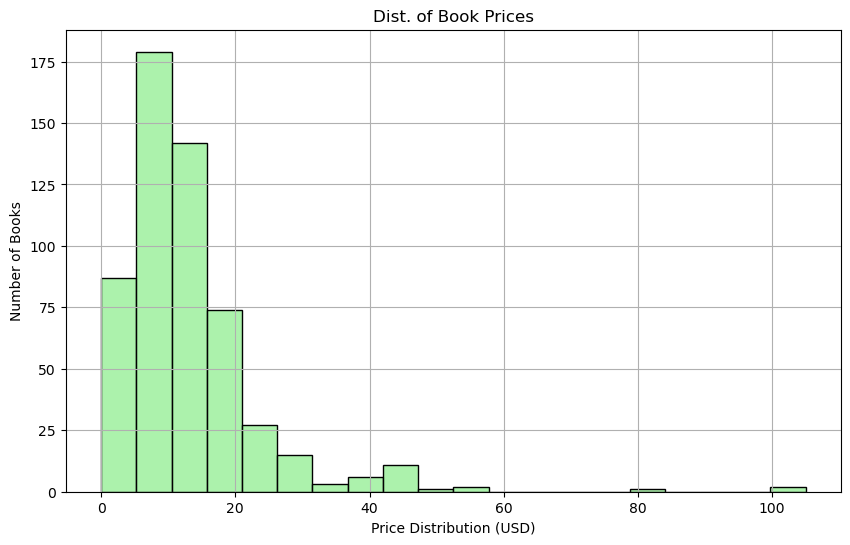

In [170]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=False, color='lightgreen', edgecolor='black')
plt.title('Dist. of Book Prices')
plt.xlabel('Price Distribution (USD)')
plt.ylabel('Number of Books')
plt.grid()
plt.show()



- This histogram clearly shows the distribution of book prices for the bestseller books. 
- Most of the books are priced in the range of 0 - 20 USD. A very few books are placed above 20 USD.
- That too the most number of books are priced between 5 - 15 USD.
- The pricing strategies that we can suggest for publishers are
  - If the publishers come to know that this price segment (5-15 USD) is selling more then the best way to sell a book is to keep the pricing of the book in that particular segment.
  - Instead of selling it for more price if they keep this in this price segment, more number of copies they can sell and so that they can yield more profit by selling the books in more quantities.

6. What book characteristics (price, reviews, genre) correlate with higher ratings?

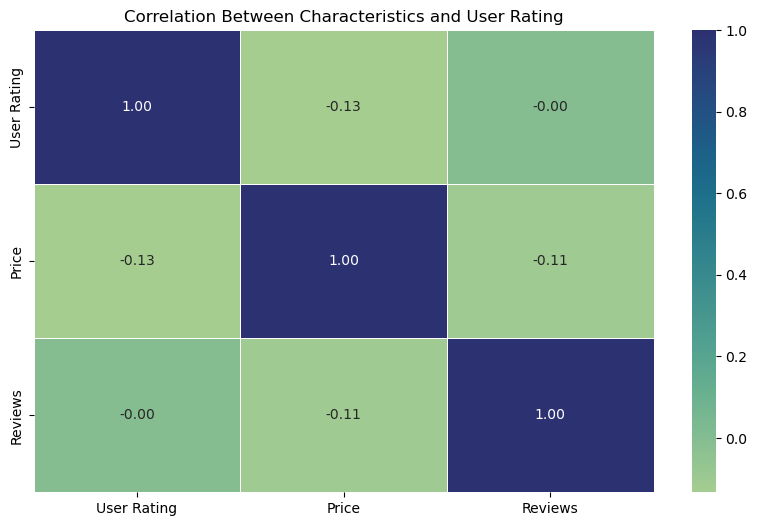

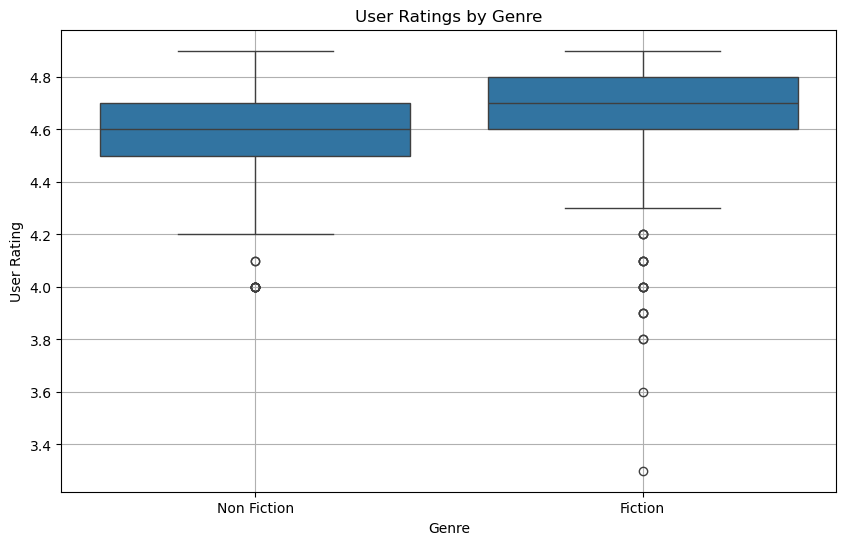

In [179]:
num_corr = df[['User Rating', 'Price', 'Reviews']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(num_corr, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Characteristics and User Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='User Rating')

plt.title('User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.grid()
plt.show()



- Heatmap explains whether the user rating, price and reviews correlates with the user ratings. (numerical features)
- The boxplot shows the comparison of the user ratings for fiction vs Non Fiction genres.
- The pricing strategies that we can suggest for publishers are
  - If these numerical features shows a strong positive correlation with the user rating, the adjustment in the pricing may yield many readers to buy that particular book and give positive reviews both in the quality of the book as well as the pricing made for the book.
  - If suppose a particular genre is attracting more customers, then the publishers should concentrate on publishing and selling more books of this particular genre.

7. What are the average prices of books with the highest reviews per year?

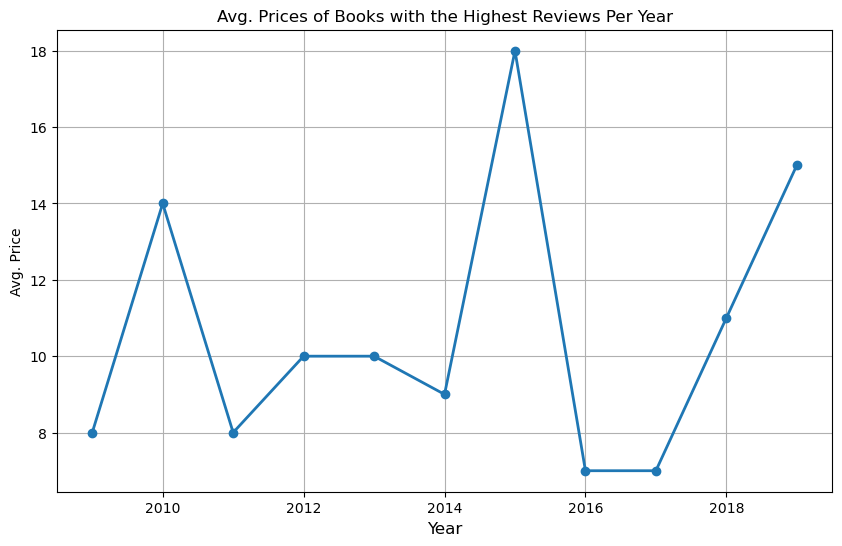

In [182]:
highest_reviews = df.loc[df.groupby('Year')['Reviews'].idxmax()]
avg_price_highest_reviews = highest_reviews.groupby('Year')['Price'].mean()
plt.figure(figsize=(10, 6))
avg_price_highest_reviews.plot(kind='line', marker='o', linestyle='-', linewidth=2)
plt.title('Avg. Prices of Books with the Highest Reviews Per Year')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg. Price')
plt.grid()
plt.show()

- This line plot shows an 'avg. price of the books which received the most no. of reviews every year.'
- The viewers are not biased towards the books which are of high priced alone, in some years they bought the best book and reviewed it even if it is a higher price. Sometimes they will also buy the books which are of low price ie. they will see only the quality of the content.
- The pricing strategies that we can suggest for publishers are
  - Publishers has to see in which years the price dropped and understand the factors which contributed for that price drop so that they won't face the same price drop in the successive years.



8. Which authors consistently produce highly rated books?

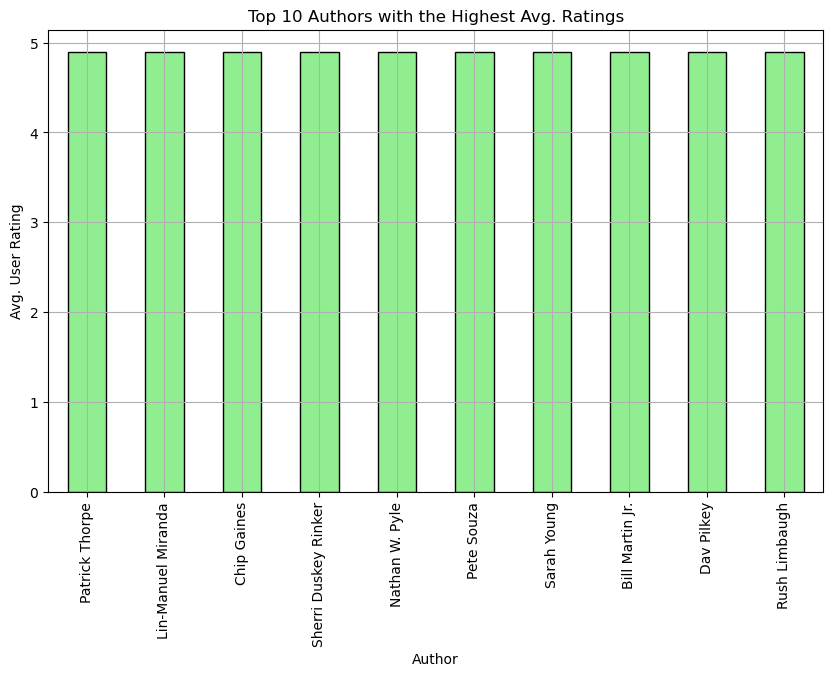

In [188]:
top_auth_ratings = df.groupby('Author')['User Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_auth_ratings.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Top 10 Authors with the Highest Avg. Ratings')
plt.xlabel('Author')
plt.ylabel('Avg. User Rating')
plt.grid()

plt.show()

- The bar chart clearly shows that the top 10 authors whose books have the highest user ratings.
- This bar chart shows all the top authors books have the similar ratings in the comparison. So the average rating is common for the best seller books of top authors.
- The pricing strategies that we can suggest for publishers are
  - The best strategy for publishers to maximize their profit is to make sure that these publishers collaborate with the same authors for the next years in producing a high quality content books
  - Publishers has to mention the highly rated perspective in top of the paper heads of their books to attract the readers.


9. Are higher-priced books more prevalent in Fiction or Non-Fiction?

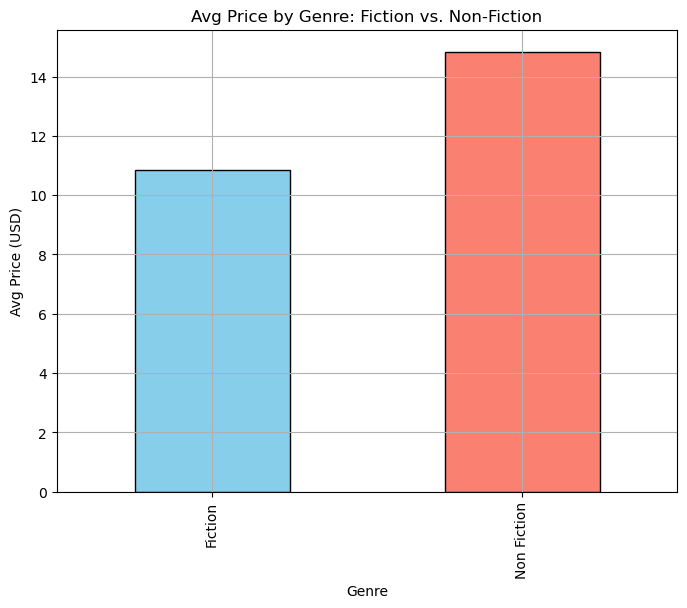

In [192]:
avg_price_by_genre = df.groupby('Genre')['Price'].mean()

plt.figure(figsize=(8, 6))
avg_price_by_genre.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Avg Price by Genre: Fiction vs. Non-Fiction')
plt.xlabel('Genre')
plt.ylabel('Avg Price (USD)')
plt.grid()
plt.show()

- The bar plot clearly shows that the comparison of the avg. price of the fiction and non fiction books
- The non fiction books have the higher average pricing, which means the readers are ok with paying more for the informative or education related contents.
- The pricing strategies that we can suggest for publishers are
  - Publishers should do a proper marketing campaigning inorder to sell the fiction books also for higher pricing by some taglines such as "unique stories"
  - Even publishers can quote initially for higher prices then they can sell the same book for lower prices in the form of "30% offer - Price drop" kind of taglines. So that people will buy those books thinking that they'll save money if they purchased the book right now.

10. What is the distribution of books by price and year?

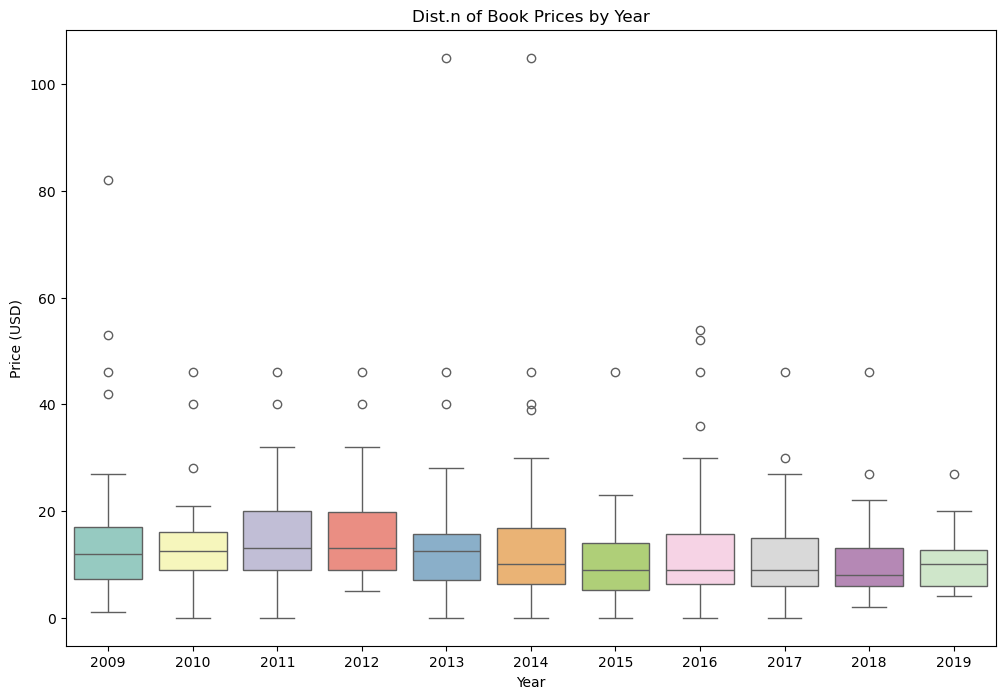

In [196]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Year', y='Price', palette='Set3')
plt.title('Dist.n of Book Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.show()

- This boxplot clearly shows the distribution of prices of best seller books each and every year.
- Here it highlights the spread of prices by mentioning the min, max and IQR ranges of the prices feature. And this plot is also used in identifying the outlier prices ie.occasionally the prices may hike for some books.
- The pricing strategies that we can suggest for publishers are
  - From this data publishers should be aware that due to some technical errors some books which are of lower prices are some time priced in a very high price which will make the buyer irritate and that may create that customer to avoid that publisher in his next subsequent purchases.
  - Publishers can make use of this yearly trend and adjust their pricing for the books that they are going to release next year.